**Boosting Techniques - Assignment**

**Question 1: What is Boosting in Machine Learning? Explain how it improves weak learners.**

Boosting is a machine learning ensemble technique that creates a strong predictive model by sequentially training weak learners, where each new model focuses on correcting the errors of the previous ones.

It improves weak learners by iteratively adjusting the weights of misclassified training instances, forcing each subsequent learner to pay more attention to the difficult-to-predict examples. This process reduces bias and leads to a highly accurate final model.

**Question 2: What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?**

The main difference is how they identify and correct errors:

AdaBoost increases the weights of misclassified data points to make them more important for the next model, while Gradient Boosting builds new models to predict the residual errors (the difference between the actual and predicted values) of the previous model by minimizing a loss function using gradient descent

**Question 3: How does regularization help in XGBoost?**

Regularization helps control model complexity by adding penalties to the loss function, discouraging the model from fitting noise in the training data. Understanding and leveraging these regularization options is crucial for optimizing XGBoost models and achieving better performance on unseen data.

**Question 4: Why is CatBoost considered efficient for handling categorical data?**

CatBoost is efficient for handling categorical data because it automatically applies Ordered Target Encoding to convert categorical features into numerical values without manual preprocessing, which prevents overfitting and saves time.

**Question 5: What are some real-world applications where boosting techniques are preferred over bagging methods?**


Boosting is preferred in applications where the goal is to achieve the highest possible accuracy and reduce bias, as it sequentially improves upon the mistakes of previous models. Examples include customer churn prediction in e-commerce, financial forecasting, and medical diagnosis like cancer survival time prediction or cardiovascular risk factor identification, where a highly accurate prediction is crucial.

Datasets:
- Use sklearn.datasets.load_breast_cancer() for classification tasks.
- Use sklearn.datasets.fetch_california_housing() for regression
tasks.

Question 6: Write a Python program to:
- Train an AdaBoost Classifier on the Breast Cancer dataset
- Print the model accuracy


In [1]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Load the breast cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Split the dataset into training set and test set
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create AdaBoost Classifier object
# Uses a Decision Tree Classifier as the default base estimator
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=42)

# Train AdaBoost Classifer model
model = abc.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = model.predict(X_test)

# Model Accuracy, how often is the classifier correct?
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.9707602339181286


Question 7: Write a Python program to:
- Train a Gradient Boosting Regressor on the California Housing dataset
- Evaluate performance using R-squared score

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load the California Housing dataset
california_housing = fetch_california_housing(as_frame=True)
X = california_housing.data
y = california_housing.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor model
# You can tune hyperparameters like n_estimators, learning_rate, and max_depth
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gbr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gbr_model.predict(X_test)

# Evaluate the model using R-squared score
r_squared = r2_score(y_test, y_pred)

print(f"Gradient Boosting Regressor R-squared score: {r_squared:.4f}")

Gradient Boosting Regressor R-squared score: 0.7756


Question 8: Write a Python program to:
- Train an XGBoost Classifier on the Breast Cancer dataset
- Tune the learning rate using GridSearchCV
- Print the best parameters and accuracy

In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

def tune_xgboost_learning_rate():
    """
    Trains an XGBoost Classifier on the Breast Cancer dataset, tunes the
    learning rate using GridSearchCV, and prints the best parameters and accuracy.
    """
    # 1. Load the Breast Cancer dataset
    cancer = load_breast_cancer()
    X = cancer.data
    y = cancer.target

    # 2. Split the data into training and testing sets
    # We use the full dataset for GridSearch with cross-validation,
    # and a held-out test set for final evaluation.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # 3. Define the XGBoost Classifier model
    # We start with default parameters, except for those we are tuning.
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

    # 4. Define the parameter grid for learning_rate
    # We will search over a range of learning rates.
    learning_rates = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
    param_grid = dict(learning_rate=learning_rates)

    # 5. Configure the GridSearchCV
    # We use StratifiedKFold for cross-validation to maintain class balance in each fold.
    # The 'accuracy' scoring metric is a good choice for this balanced binary classification problem.
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring="accuracy",
                               n_jobs=-1, cv=kfold, verbose=1)

    # 6. Fit the GridSearchCV to the training data
    grid_result = grid_search.fit(X_train, y_train)

    # 7. Print the best parameters and the cross-validation accuracy
    print(f"Best parameters found: {grid_result.best_params_}")
    print(f"Best cross-validation accuracy: {grid_result.best_score_:.4f}")

    # 8. Evaluate the best estimator on the held-out test set
    best_model = grid_result.best_estimator_
    y_pred = best_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy on test set with best model: {test_accuracy:.4f}")

if __name__ == "__main__":
    tune_xgboost_learning_rate()

Fitting 10 folds for each of 6 candidates, totalling 60 fits
Best parameters found: {'learning_rate': 0.2}
Best cross-validation accuracy: 0.9673

Accuracy on test set with best model: 0.9649


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:58:23] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Question 9: Write a Python program to:
- Train a CatBoost Classifier
- Plot the confusion matrix using seaborn

In [4]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.6 MB/s eta 0:00:00


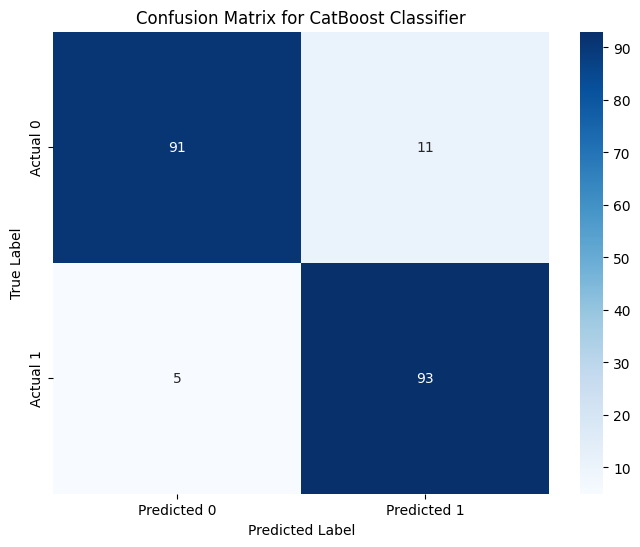


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       102
           1       0.89      0.95      0.92        98

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200



In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import make_classification

# 1. Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10,
                           n_redundant=5, n_classes=2, random_state=42)
feature_names = [f'feature_{i}' for i in range(X.shape[1])]
X = pd.DataFrame(X, columns=feature_names)
y = pd.Series(y, name='target')

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train a CatBoost Classifier
# Initialize CatBoostClassifier with some parameters
# You can adjust parameters like iterations, learning_rate, depth, etc.
cat_model = CatBoostClassifier(iterations=100,  # Number of boosting iterations
                               learning_rate=0.1, # Step size shrinkage
                               depth=6,           # Depth of the tree
                               loss_function='Logloss', # Loss function for binary classification
                               random_seed=42,    # For reproducibility
                               verbose=False)     # Suppress verbose output during training

# Train the model
cat_model.fit(X_train, y_train)

# 4. Make predictions on the test set
y_pred = cat_model.predict(X_test)

# 5. Plot the confusion matrix using Seaborn
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for CatBoost Classifier')
plt.show()

# Optional: Print classification report for more metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Question 10: You're working for a FinTech company trying to predict loan default using customer demographics and transaction behavior.
The dataset is imbalanced, contains missing values, and has both numeric and categorical features.

Describe your step-by-step data science pipeline using boosting techniques:
- Data preprocessing & handling missing/categorical values
- Choice between AdaBoost, XGBoost, or CatBoost
- Hyperparameter tuning strategy
- Evaluation metrics you'd choose and why
- How the business would benefit from your model

For an imbalanced loan default prediction project, a data science pipeline using boosting involves: handling missing values via imputation and using SMOTE to balance the dataset; encoding categorical features with one-hot or target encoding; and choosing XGBoost or CatBoost for their superior performance and built-in handling of categorical features.

Hyperparameters are tuned using Grid Search or Random Search, and evaluation is based on AUC, Precision, Recall, and F1-score, with a focus on the "default" class.

The business benefits from proactive risk management, optimized loan approvals, and reduced financial losses.